<a href="https://colab.research.google.com/github/primriq/ML-Apex-Univ/blob/main/Simple_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 style="color:green" align="center">Predicting Insurance Purchase Using Logistic Regression</h2>

In this notebook, we build a **binary logistic regression** model to predict whether a person will buy life insurance based on their age.

We will:
1. Load the dataset from a GitHub repository
2. Explore the data visually
3. Split the data into training and test sets
4. Train a logistic regression model
5. Evaluate it using accuracy, confusion matrix, precision, recall, and F1 score
6. Use the model to make predictions for specific ages


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    accuracy_score,
    classification_report
)

We load the dataset directly from the Codebasics GitHub repository using its **raw** URL.

In [2]:
url = "https://raw.githubusercontent.com/primriq/ML-Apex-Univ/refs/heads/main/Datasets/insurance_data.csv"
df = pd.read_csv(url)
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


The dataset has two columns:

- **age**: Age of the person
- **bought_insurance**: 1 if the person bought insurance, 0 otherwise


Let's visualize how `bought_insurance` varies with age.

Text(0.5, 1.0, 'Age vs Insurance Purchase')

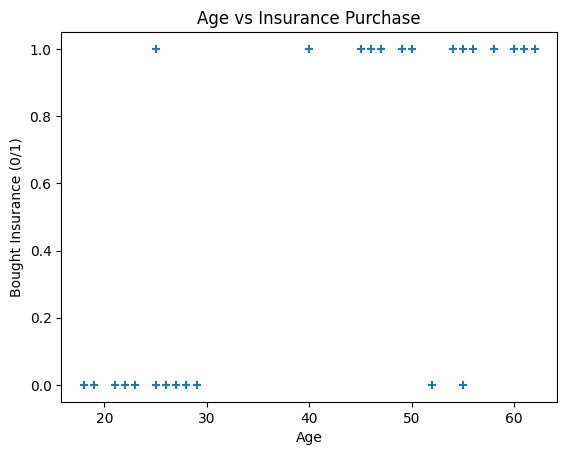

In [3]:
plt.scatter(df.age, df.bought_insurance, marker='+')
plt.xlabel('Age')
plt.ylabel('Bought Insurance (0/1)')
plt.title('Age vs Insurance Purchase')

Next, we split the data into **training** and **test** sets so we can evaluate how well the model generalizes to unseen data.

In [4]:
X = df[['age']]
y = df['bought_insurance']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=1
)
X_train.head()

,age
20,21
21,26
4,46
2,47
22,40


We now create a `LogisticRegression` model and train it using the training data.

In [5]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

We can get a quick sense of model performance on the test set using the built-in `score` method, which returns the **accuracy**.

In [6]:
basic_accuracy = model.score(X_test, y_test)
print('Test Accuracy (model.score):', basic_accuracy)

Test Accuracy (model.score): 0.8333333333333334


To understand performance more deeply, we generate predictions on the test set and compute:
- Confusion matrix
- Accuracy
- Precision
- Recall
- F1 score
- Complete classification report


In [7]:
# Predictions on test data
y_predicted = model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_predicted)
print('Confusion Matrix:\n', cm)

# Other metrics
print('Accuracy:', accuracy_score(y_test, y_predicted))
print('Precision:', precision_score(y_test, y_predicted))
print('Recall:', recall_score(y_test, y_predicted))
print('F1 Score:', f1_score(y_test, y_predicted))

print('\nClassification Report:\n', classification_report(y_test, y_predicted))

Confusion Matrix:
 [[2 1]
 [0 3]]
Accuracy: 0.8333333333333334
Precision: 0.75
Recall: 1.0
F1 Score: 0.8571428571428571

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.75      1.00      0.86         3

    accuracy                           0.83         6
   macro avg       0.88      0.83      0.83         6
weighted avg       0.88      0.83      0.83         6



Now let's use the trained model to predict whether a person of a given age is likely to buy insurance. We can also look at the **probability** predicted by the model.

For example, let's try ages 25, 35, and 45.

In [8]:
ages_to_predict = [[25], [35], [45]]
predictions = model.predict(ages_to_predict)
probabilities = model.predict_proba(ages_to_predict)
for age, pred, prob in zip([25, 35, 45], predictions, probabilities):
    print(f'Age: {age} -> Predicted: {pred}, Probability (No, Yes): {prob}')

Age: 25 -> Predicted: 0, Probability (No, Yes): [0.8624094 0.1375906]
Age: 35 -> Predicted: 0, Probability (No, Yes): [0.59235446 0.40764554]
Age: 45 -> Predicted: 1, Probability (No, Yes): [0.25198884 0.74801116]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Behind the scenes, logistic regression uses the **sigmoid function** to convert a linear combination of inputs into a probability between 0 and 1.

We can define a simple sigmoid function to see how an input value maps to a probability.

In [9]:
import math

def sigmoid(x):
    return 1 / (1 + math.exp(-x))

sigmoid(0), sigmoid(2), sigmoid(-2)

(0.5, 0.8807970779778823, 0.11920292202211755)

In summary, we used **logistic regression** to model the probability of a person buying insurance based on age, evaluated the model using several metrics, and made predictions for specific ages.

You can now extend this approach to more features (e.g., income, number of dependents, etc.) for a more realistic model.